In [1]:
%matplotlib notebook 
import os
import sys
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import sqlite3

import lsst.geom 
import lsst.afw.display as afwDisplay
import lsst.daf.persistence as dafPersist
afwDisplay.setDefaultBackend('matplotlib')

In [2]:
# HiTS dataset  for the image 
repo = '/project/mrawls/hits2015/rerun/cw_processed4/' 
butler = dafPersist.Butler(repo)

# dataset for the template 
templateRepo = '/project/mrawls/hits2014/coadds_processed2/'
templateButler = dafPersist.Butler(templateRepo)

In [3]:
# the image to display 
dataIdTest = {'visit':410987, 'ccdnum':51}
calexp = butler.get('calexp', dataId = dataIdTest)

# the difference image 
diffim = butler.get('deepDiff_differenceExp', dataId = dataIdTest)

<IPython.core.display.Javascript object>


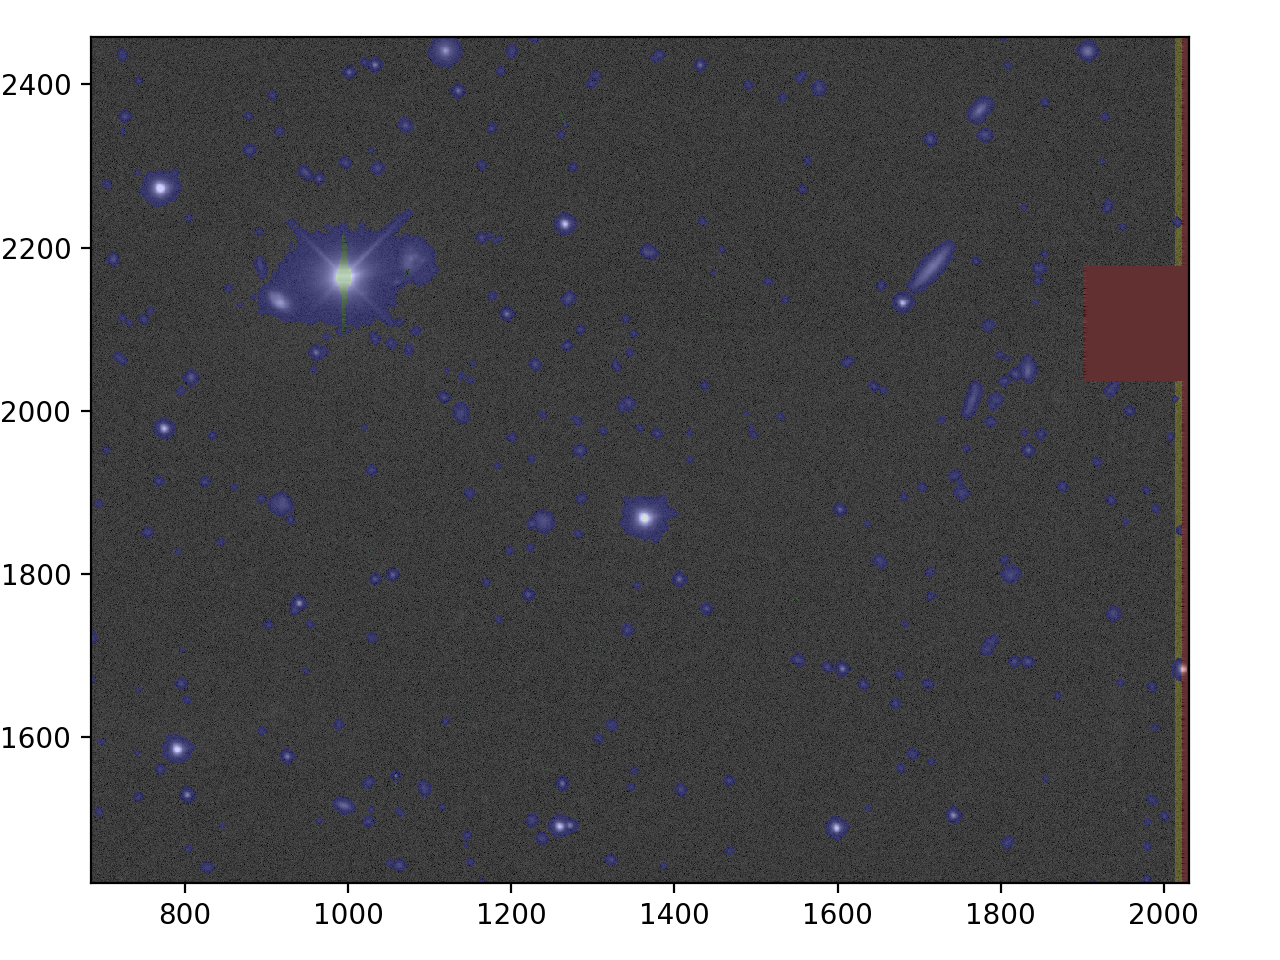

In [11]:
# the plotting space 
displ = afwDisplay.Display(1) # 1 is Fig.1  , etc. .... # need to define plotting space 
displ.setMaskTransparency(80)  # setting alpha to 80%
displ.scale('asinh', 'zscale', Q=8)
displ.mtv(calexp)

# zoom with the box 

<IPython.core.display.Javascript object>


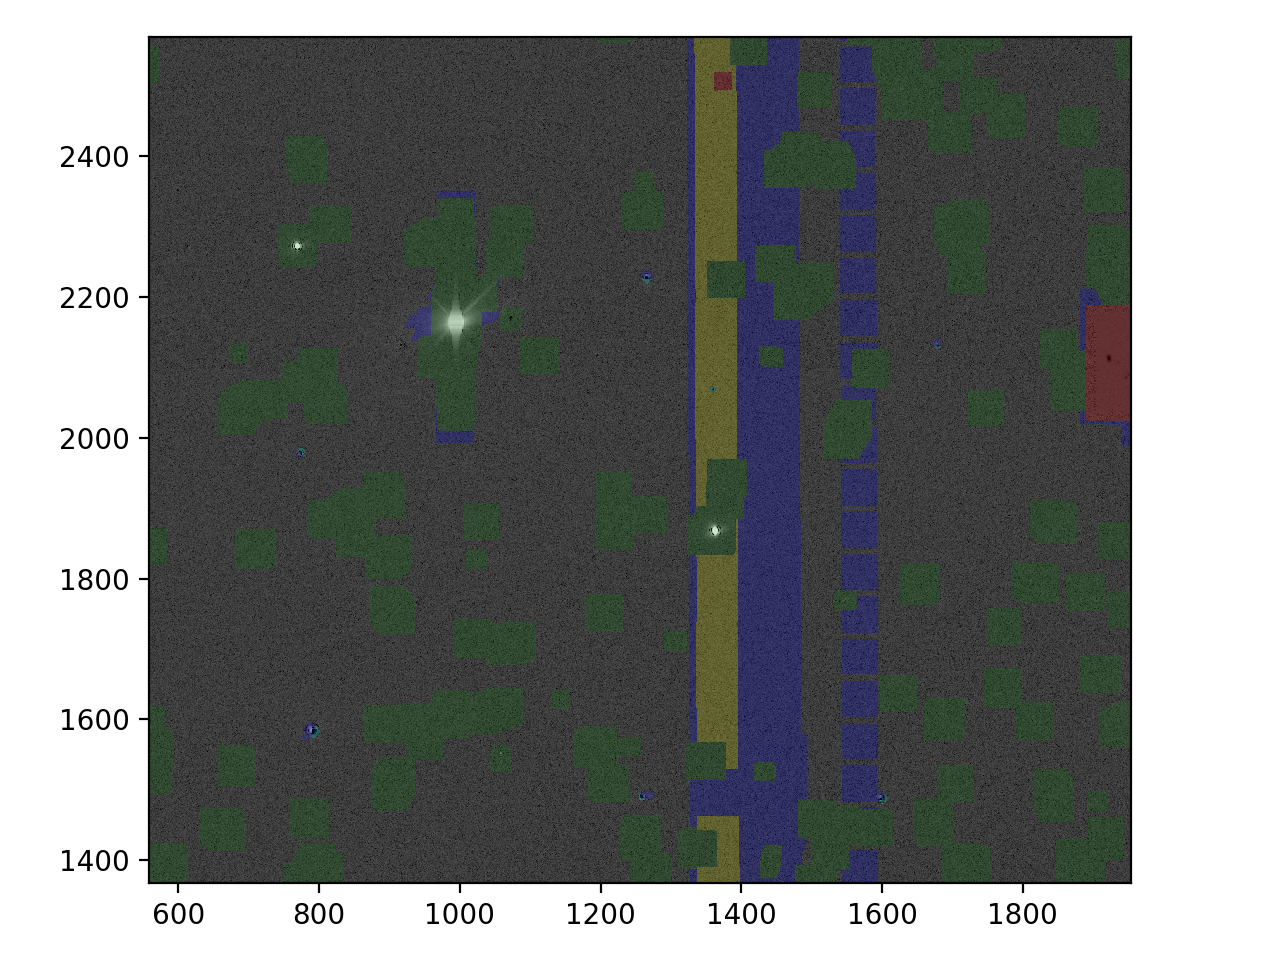

In [12]:
displ1 = afwDisplay.Display(2) # 1 is Fig.1  , etc. .... # need to define plotting space 
displ1.setMaskTransparency(80)  # setting alpha to 80%
displ1.scale('asinh', 'zscale', Q=8)
displ1.mtv(diffim) # difference image 

## Looking at PPDB (prompt products database from running ap_pipe)

In [3]:
sys.path.append('/project/mrawls/ap_pipe-notebooks/')

import importlib
from diaObjectAnalysis import loadAllPpdbObjects
import plotLightcurve as plc

importlib.reload(plc)



<module 'plotLightcurve' from '/project/mrawls/ap_pipe-notebooks/plotLightcurve.py'>

In [4]:
# a summary of each astrophysical objects
# takes a minute to load 
objTable = loadAllPpdbObjects(repo)  


In [5]:
# dia   = "difference image analysis" 
# summary of different visits ....
# diaObjectId  is  an object keeping the source detected on multiple visits
# 

objTable[:4]

,diaObjectId,ra,decl,nDiaSources,gPSFluxMean,validityEnd,flags
0,176486811852341340,150.918168,2.142636,1,37753.828125,None,1
1,176486811852341383,151.120029,2.065347,1,4399.124512,None,1
2,176486811852341400,151.193502,2.180162,1,5004.369629,None,1
3,176486820442276233,149.516292,2.038845,1,-126.093803,None,1


In [6]:
objIdTest = 176492683072635251  # an object with 49 detections in different visits 

objTable[objTable.diaObjectId == objIdTest]

,diaObjectId,ra,decl,nDiaSources,gPSFluxMean,validityEnd,flags
456401,176492683072635251,155.063776,-5.804262,49,1218.450806,None,1


Loading PPDB Sources...
DIAObject ID: 176492683072635251
RA (deg): [155.06377586]
Dec (deg): [-5.80426222]
Number of DIASources: 49
Template patch: 11,7


<IPython.core.display.Javascript object>


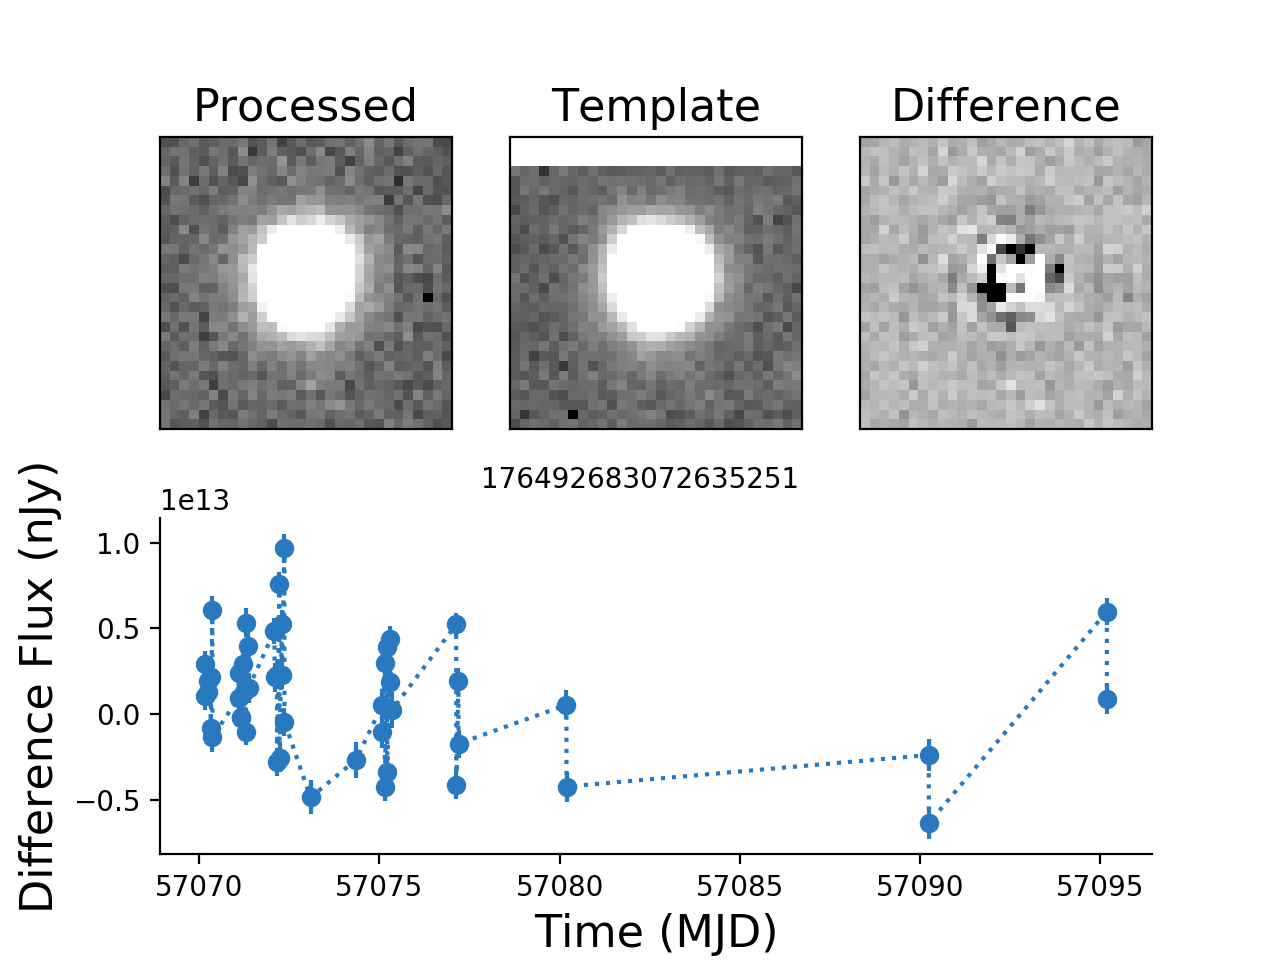

<IPython.core.display.Javascript object>


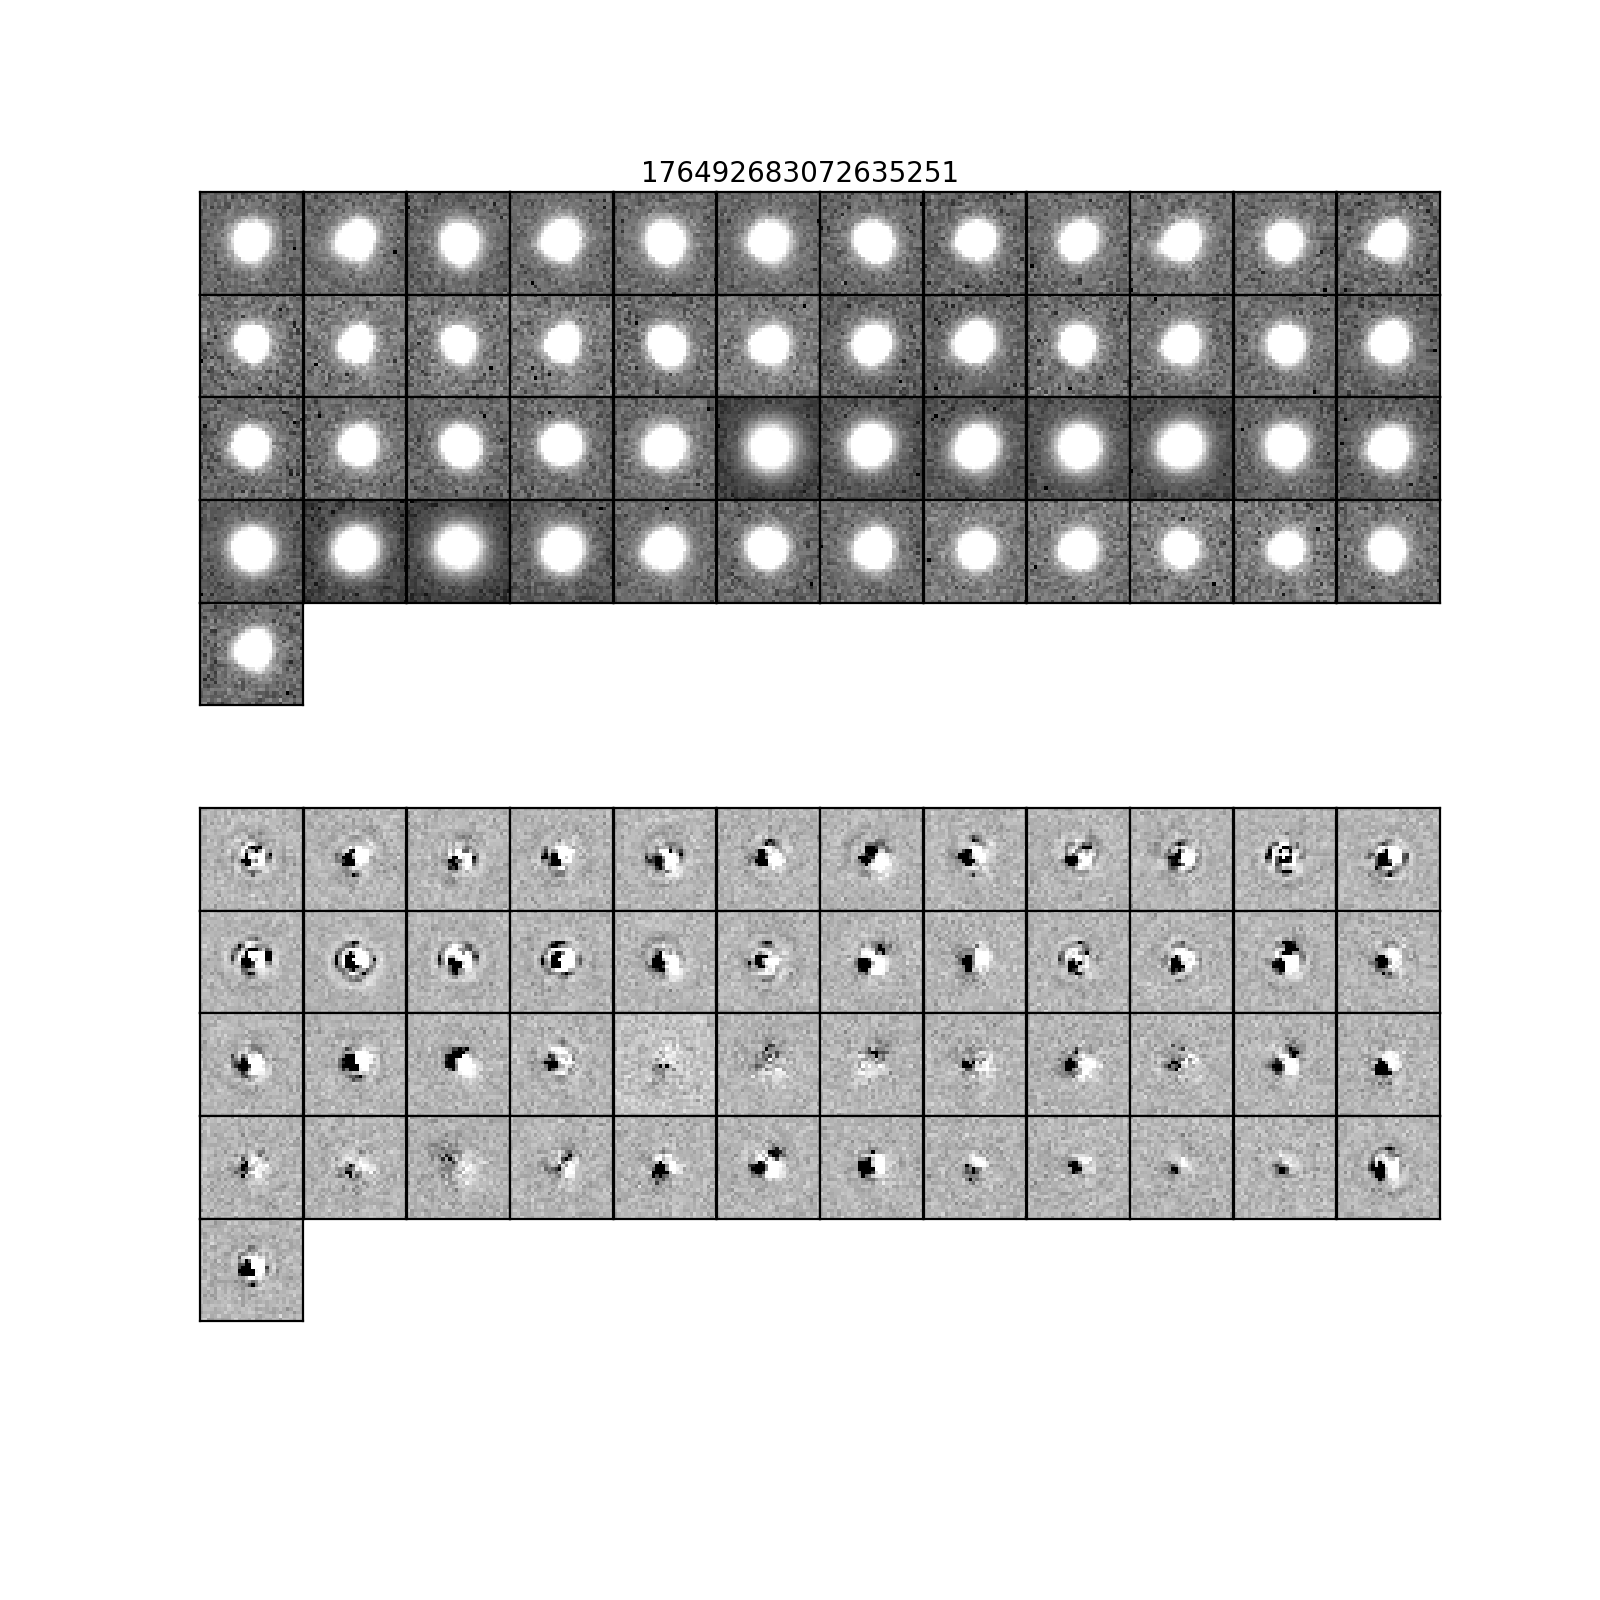

In [7]:
# takes a long time ...
patchList = ['11,7']
plc.plotLightcurve(objIdTest, objTable, repo, 'association.db', templateRepo, patchList, plotAllCutouts = True )

In [ ]:
# show sources 
dbPath = os.path.join(repo, 'association.db')
sources = plc.loadPpdbSources(dbPath, objIdTest )